## Performing Cluster Analysis on the General Industries Training File

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\subha\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\subha\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\subha\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)
C:\Users\subha\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
general_df = pd.read_excel('general_industries_df_case_competition_scrambled_train.xlsx', sheet_name='Data')

In [3]:
general_df.head()

,ROW,Corp_Residence_Country_Code,BR Code,Period,CUSTOMER_ID,Final_IG,B_PLUS_FLAG,EBITDA_Y0,EBITDA_Y1,EBITDA_Y2,...,RETAINED_EARNINGS_Y1,RETAINED_EARNINGS_Y2,RETAINED_EARNINGS_Y3,FCF_Y0,FCF_Y1,FCF_Y2,CCE_Y0,CCE_Y1,CCE_Y2,CCE_Y3
0,28464,2,4,2017Q1,8228,8,1,365604.767017,341575.264490,368053.254720,...,373864.705143,369694.522194,339867.222381,364236.569625,NaN,NaN,350599.333501,368971.137940,342125.692144,360512.171013
1,39693,3,63,2018Q4,12315,7,1,748378.874160,593272.587785,606298.959960,...,605658.829652,510342.796894,705321.337524,577814.590748,464235.132963,617901.795410,551960.406798,460369.335404,391812.102849,416234.858630
2,19535,15,13,2018Q2,5504,6,1,379351.685119,394182.092405,380051.883962,...,372940.581700,356833.167530,367306.071112,387950.807778,389893.413929,364549.242197,370680.802471,371698.484955,362778.394801,366921.505401
3,4286,2,4,2020Q1,1107,8,1,363552.396086,371786.373645,371542.067484,...,356411.077910,342327.527537,366354.742233,372030.051844,374857.163137,362254.021673,366611.785072,344896.040064,367964.677168,350629.253166
4,39621,59,30,2019Q2,12294,8,1,368530.936855,367450.033454,358297.870364,...,355608.575949,351911.163051,NaN,NaN,NaN,NaN,350505.223417,347030.412041,360238.097158,NaN


In [4]:
general_df = general_df.sort_values(by = ['ROW'], ascending=False)

In [5]:
for i in range(general_df.shape[1]):
    n_miss = general_df.iloc[:, [i]].isnull().sum()
    perc = n_miss / general_df.shape[0] * 100
    print('> %s, Missing: %d (%.1f%%)' % (general_df.columns[i], n_miss, perc))

> ROW, Missing: 0 (0.0%)
> Corp_Residence_Country_Code, Missing: 0 (0.0%)
> BR Code, Missing: 0 (0.0%)
> Period, Missing: 0 (0.0%)
> CUSTOMER_ID, Missing: 0 (0.0%)
> Final_IG, Missing: 0 (0.0%)
> B_PLUS_FLAG, Missing: 0 (0.0%)
> EBITDA_Y0, Missing: 0 (0.0%)
> EBITDA_Y1, Missing: 2090 (7.3%)
> EBITDA_Y2, Missing: 6664 (23.4%)
> EBITDA_Y3, Missing: 11591 (40.7%)
> TOTALASSET_Y0, Missing: 14 (0.0%)
> TOTALASSET_Y1, Missing: 2095 (7.4%)
> TOTALASSET_Y2, Missing: 6719 (23.6%)
> TOTALASSET_Y3, Missing: 11634 (40.9%)
> TOTALDEBT_Y0, Missing: 328 (1.2%)
> TOTALDEBT_Y1, Missing: 2330 (8.2%)
> TOTALDEBT_Y2, Missing: 6809 (23.9%)
> TOTALDEBT_Y3, Missing: 11696 (41.1%)
> TOTALREVENUE_Y0, Missing: 513 (1.8%)
> TOTALREVENUE_Y1, Missing: 2478 (8.7%)
> TOTALREVENUE_Y2, Missing: 6910 (24.3%)
> TOTALREVENUE_Y3, Missing: 11776 (41.4%)
> CURRENTASSET_Y0, Missing: 27 (0.1%)
> CURRENTASSET_Y1, Missing: 2089 (7.3%)
> CURRENTASSET_Y2, Missing: 6667 (23.4%)
> CURRENTASSET_Y3, Missing: 11580 (40.7%)
> FIXEDASSE

In [6]:
#non-financial features
non_fin_features = ['ROW', 'Corp_Residence_Country_Code', 'BR Code', 'Period', 'CUSTOMER_ID', 'Final_IG', 'B_PLUS_FLAG']
#financial features
fin_features = np.sort(list(set(general_df.columns) - set(non_fin_features)))

In [7]:
#Calculating 3-Year Averages
def three_year_average(X, col_y0, col_y1, col_y2, col):
    X.drop(X[X[col_y0].isnull()].index, inplace = True)
    
    X[col] = X[col_y0]
    
    two_years_average = X[col_y1].notnull() & X[col_y2].isnull()
    X.loc[two_years_average, col] = X.loc[two_years_average, col_y0] * 4/7 + X.loc[two_years_average, col_y1] * 3/7
    
    three_years_average = X[col_y1].notnull() & X[col_y2].notnull()
    X.loc[three_years_average, col] = X.loc[three_years_average, col_y0] * 4/9 + X.loc[three_years_average, col_y1] * 3/9 + X.loc[three_years_average, col_y2] * 2/9
    
    return X

cols_to_avg = []

for col in fin_features:
    if (col.endswith('Y0') and not col.endswith('growth_Y0')):
        cols_to_avg.append([col, col[:-2] + 'Y1', col[:-2] + 'Y2', col[:-2] + '3YearAverage'])

data_left = general_df.copy()
for col0, col1, col2, col in cols_to_avg:
    orig_num_data = len(data_left)
    data_left = three_year_average(data_left, col0, col1, col2, col)
    remaining_data = len(data_left)
    print((orig_num_data - remaining_data), 'data records are dropped due to ' + col + '\n')

430 data records are dropped due to ARTurnover_3YearAverage

115 data records are dropped due to ASSETTURNOVER_3YearAverage

4 data records are dropped due to CAPITALIZATION_3YearAverage

75 data records are dropped due to CCE_3YearAverage

0 data records are dropped due to CURRENTASSET_3YearAverage

0 data records are dropped due to CURRENTLIABILITY_3YearAverage

2533 data records are dropped due to Capex2Dep_3YearAverage

0 data records are dropped due to DEBTSERVCOV_3YearAverage

0 data records are dropped due to EBITDAR_3YearAverage

0 data records are dropped due to EBITDA_3YearAverage

2471 data records are dropped due to FCF_3YearAverage

0 data records are dropped due to FIXEDASSET_3YearAverage

0 data records are dropped due to FIXEDCHARGECOV_3YearAverage

873 data records are dropped due to INVENTORYDAYS_3YearAverage

0 data records are dropped due to INVENTORY_3YearAverage

0 data records are dropped due to LEASERENTEXP_3YearAverage

0 data records are dropped due to NETPROF

In [8]:
data_left = data_left.reset_index(drop = True)

In [10]:
#Calculating financial ratios
for i in range(4):
    data_left['DEBT2EBITDA_Y'+str(i)] = data_left['TOTALDEBT_Y'+str(i)] / data_left['EBITDA_Y' + str(i)]
    data_left['DEBT2CAPT_Y'+str(i)] = data_left['TOTALDEBT_Y'+str(i)] / data_left['CAPITALIZATION_Y' + str(i)]
    data_left['DEBT2EQUITY_Y'+str(i)] = data_left['TOTALDEBT_Y'+str(i)] / data_left['TOTALEQUITY_Y' + str(i)]
    data_left['DEBT2ASSET_Y'+str(i)] = data_left['TOTALDEBT_Y'+str(i)] / data_left['TOTALASSET_Y' + str(i)]
    data_left['DEBT2TANGIBLENW_Y'+str(i)] = data_left['TOTALDEBT_Y'+str(i)] / data_left['tangibleNetWorth_Y' + str(i)]
    data_left['CASH2ASSET_Y'+str(i)] = data_left['CCE_Y'+str(i)] / data_left['TOTALASSET_Y' + str(i)]
    data_left['CASH2DEBT_Y'+str(i)] = data_left['CCE_Y'+str(i)] / data_left['TOTALDEBT_Y' + str(i)]
    data_left['CA2CL_Y'+str(i)] = data_left['CURRENTASSET_Y'+str(i)] / data_left['CURRENTLIABILITY_Y' + str(i)]
    
for i in range(3):
    data_left['DEBT2FCF_Y'+str(i)] = data_left['TOTALDEBT_Y' + str(i)] / data_left['FCF_Y'+str(i)]

In [11]:
#adding new features
new_feat = ['DEBT2EBITDA_Y','DEBT2CAPT_Y', 'DEBT2EQUITY_Y', 'DEBT2ASSET_Y', 'DEBT2TANGIBLENW_Y', 'CASH2ASSET_Y', 'CASH2DEBT_Y', 'CA2CL_Y']
for i in range(4):
    for feat in new_feat:
        fin_features = list(fin_features) + list([feat + str(i)])

for i in range(3):
    fin_features = list(fin_features) + list(['DEBT2FCF_Y'+str(i)])

fin_features = np.sort(fin_features)

In [12]:
actual = data_left.drop(['ROW', 'Corp_Residence_Country_Code', 'BR Code', 'Period'], axis=1)


In [13]:
actual = actual.dropna()

In [14]:
actual.head()

,CUSTOMER_ID,Final_IG,B_PLUS_FLAG,EBITDA_Y0,EBITDA_Y1,EBITDA_Y2,EBITDA_Y3,TOTALASSET_Y0,TOTALASSET_Y1,TOTALASSET_Y2,...,DEBT2CAPT_Y3,DEBT2EQUITY_Y3,DEBT2ASSET_Y3,DEBT2TANGIBLENW_Y3,CASH2ASSET_Y3,CASH2DEBT_Y3,CA2CL_Y3,DEBT2FCF_Y0,DEBT2FCF_Y1,DEBT2FCF_Y2
0,12702,2,1,2.306225e+06,3.421084e+06,2.905610e+06,1.978351e+06,1.936269e+07,1.924877e+07,1.742584e+07,...,0.244224,0.332321,0.209937,0.380301,0.201337,0.959034,1.926890,-33.471836,2.709573,2.519694
1,12701,5,1,5.643274e+05,5.866783e+05,5.796660e+05,5.925150e+05,2.221221e+06,1.969215e+06,2.078088e+06,...,0.497623,0.712154,0.376562,1.643128,0.219624,0.583234,1.141998,1.666910,1.525368,2.671231
2,12700,6,1,5.301017e+05,5.100139e+05,5.105538e+05,4.813614e+05,2.201557e+06,2.267749e+06,1.775647e+06,...,0.356997,0.356079,0.265726,0.544001,0.335726,1.263427,1.309777,2.177049,2.608792,1.922376
3,12699,6,1,2.115968e+06,1.951320e+06,1.722593e+06,1.770775e+06,6.543261e+06,5.974002e+06,5.659915e+06,...,0.832410,9.695199,0.645082,-5.274026,0.062144,0.096334,0.954691,3.989982,2.342882,2.073279
5,12697,2,1,7.075025e+06,7.214629e+06,6.918998e+06,7.548647e+06,4.378730e+07,4.251540e+07,4.243960e+07,...,0.508203,1.094223,0.338155,1.061391,0.075438,0.223086,0.973098,7.502626,3.659582,6.492239


In [15]:
#Performing standardization
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
 
df_scaled = std_scaler.fit_transform(actual.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=actual.columns)
 
print("Scaled Dataset Using StandardScaler")
df_scaled.head()

Scaled Dataset Using StandardScaler


,CUSTOMER_ID,Final_IG,B_PLUS_FLAG,EBITDA_Y0,EBITDA_Y1,EBITDA_Y2,EBITDA_Y3,TOTALASSET_Y0,TOTALASSET_Y1,TOTALASSET_Y2,...,DEBT2CAPT_Y3,DEBT2EQUITY_Y3,DEBT2ASSET_Y3,DEBT2TANGIBLENW_Y3,CASH2ASSET_Y3,CASH2DEBT_Y3,CA2CL_Y3,DEBT2FCF_Y0,DEBT2FCF_Y1,DEBT2FCF_Y2
0,1.846151,-2.094011,0.560272,0.339586,0.673239,0.075571,-0.011260,0.343672,0.366484,0.028381,...,-0.274882,-0.136793,-1.949631,-0.037899,-1.365337,-0.004797,2.158687,-0.030000,0.057716,0.018408
1,1.845877,-0.896927,0.560272,-0.138539,-0.131797,-0.031160,-0.015949,-0.140048,-0.144811,-0.026352,...,-0.157148,-0.057977,-1.352426,0.041746,-1.312191,-0.059216,0.054926,-0.010588,0.012461,0.018571
2,1.845604,-0.497900,0.560272,-0.147933,-0.153571,-0.034331,-0.016325,-0.140602,-0.135977,-0.027431,...,-0.222485,-0.131863,-1.749675,-0.027574,-0.974778,0.039281,0.504626,-0.010306,0.053865,0.017767
3,1.845331,-0.497900,0.560272,0.287363,0.255793,0.021286,-0.011962,-0.018083,-0.026311,-0.013579,...,-0.001601,1.806015,-0.390015,-0.394510,-1.769857,-0.129723,-0.447114,-0.009305,0.043703,0.017929
4,1.844785,-2.094011,0.560272,1.648551,1.750693,0.259733,0.007588,1.032916,1.054935,0.117587,...,-0.152232,0.021303,-1.490082,0.005057,-1.731222,-0.111368,-0.397780,-0.007364,0.094021,0.022671


In [16]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

C:\Users\subha\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\subha\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True,

In [17]:
#Performing K-means and obtaining distortions
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(df_scaled)
    kmeanModel.fit(df_scaled)
 
    distortions.append(sum(np.min(cdist(df_scaled, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / df_scaled.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(df_scaled, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / df_scaled.shape[0]
    mapping2[k] = kmeanModel.inertia_

C:\Users\subha\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\subha\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\subha\Anaconda3\lib\site-packages\sklearn\metrics\pairw

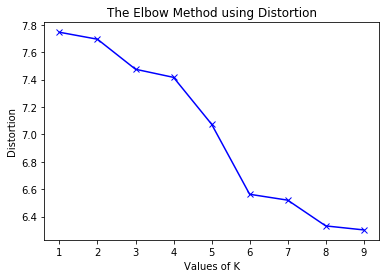

In [18]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [19]:
#Calculating the centroids
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8).fit(df_scaled)
centroids = kmeans.cluster_centers_

C:\Users\subha\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\subha\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\subha\Anaconda3\lib\site-packages\sklearn\metrics\pairw

In [20]:
#Calculating the counts in each cluster
labels = kmeans.predict(df_scaled)
from collections import Counter
Counter(labels)

C:\Users\subha\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\subha\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\subha\Anaconda3\lib\site-packages\sklearn\metrics\pairw

Counter({2: 3523, 3: 377, 0: 8380, 4: 276, 7: 59, 5: 3, 6: 5, 1: 1})

From above we see that 3 major clusters are formed.

In [22]:
df_scaled['cluster'] = labels

In [23]:
actual['cluster'] = labels
plot_df = actual[(actual.cluster == 2) | (actual.cluster == 0) |  (actual.cluster == 3)]

In [24]:
column_plot = [
    'TOTALASSET_3YearAverage',
    'TOTALDEBT_3YearAverage',
    'TOTALREVENUE_3YearAverage',
    'TOTALEQUITY_3YearAverage',
    'TOTALNETWORTH_3YearAverage',
    'NETPROFIT_3YearAverage',
    'NETSALES_3YearAverage',
    'DEBT2CAPT_Y0',
    'DEBT2ASSET_Y0',
    'DEBT2EQUITY_Y0',
    'CASH2ASSET_Y0'
]

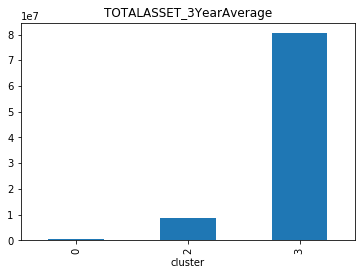

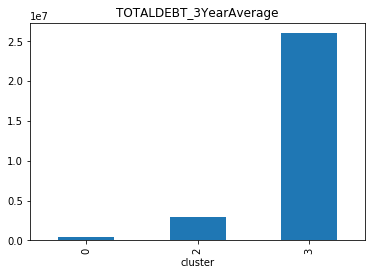

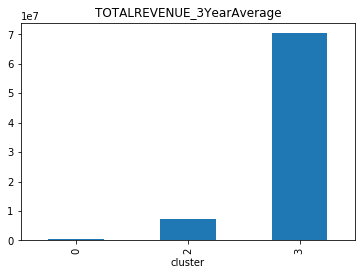

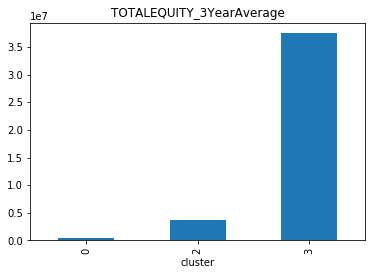

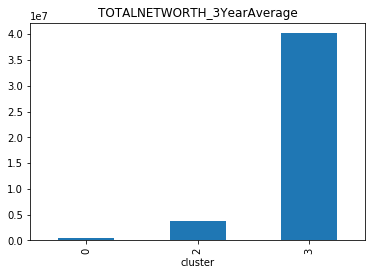

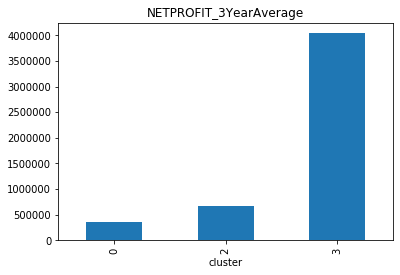

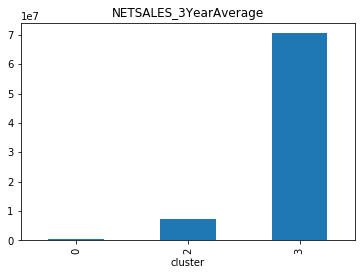

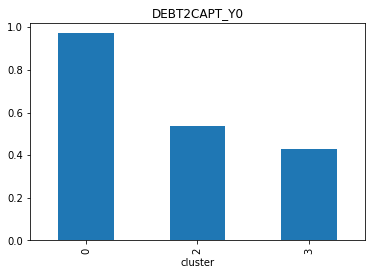

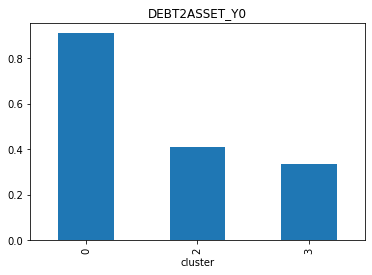

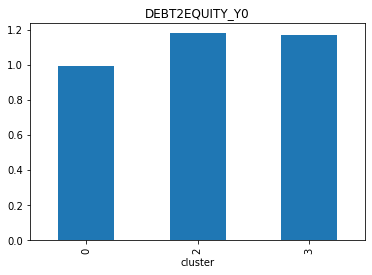

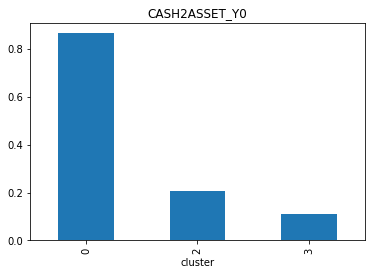

In [25]:
for c in column_plot:
    plot_df.groupby(['cluster'])[c].mean().plot(kind = 'bar', subplots = True)
    plt.show()

Based on the above images, we can see that we can cluster the companies in Small-sized, Medium-sized and Large-sized companies based on the difference in Revenue, Sales, Net Profit, Debt Ratios

In [28]:
plot_df

,CUSTOMER_ID,Final_IG,B_PLUS_FLAG,EBITDA_Y0,EBITDA_Y1,EBITDA_Y2,EBITDA_Y3,TOTALASSET_Y0,TOTALASSET_Y1,TOTALASSET_Y2,...,DEBT2EQUITY_Y3,DEBT2ASSET_Y3,DEBT2TANGIBLENW_Y3,CASH2ASSET_Y3,CASH2DEBT_Y3,CA2CL_Y3,DEBT2FCF_Y0,DEBT2FCF_Y1,DEBT2FCF_Y2,cluster
0,12702,2,1,2.306225e+06,3.421084e+06,2.905610e+06,1.978351e+06,1.936269e+07,1.924877e+07,1.742584e+07,...,0.332321,0.209937,0.380301,0.201337,0.959034,1.926890,-33.471836,2.709573,2.519694,2
1,12701,5,1,5.643274e+05,5.866783e+05,5.796660e+05,5.925150e+05,2.221221e+06,1.969215e+06,2.078088e+06,...,0.712154,0.376562,1.643128,0.219624,0.583234,1.141998,1.666910,1.525368,2.671231,2
2,12700,6,1,5.301017e+05,5.100139e+05,5.105538e+05,4.813614e+05,2.201557e+06,2.267749e+06,1.775647e+06,...,0.356079,0.265726,0.544001,0.335726,1.263427,1.309777,2.177049,2.608792,1.922376,2
3,12699,6,1,2.115968e+06,1.951320e+06,1.722593e+06,1.770775e+06,6.543261e+06,5.974002e+06,5.659915e+06,...,9.695199,0.645082,-5.274026,0.062144,0.096334,0.954691,3.989982,2.342882,2.073279,2
5,12697,2,1,7.075025e+06,7.214629e+06,6.918998e+06,7.548647e+06,4.378730e+07,4.251540e+07,4.243960e+07,...,1.094223,0.338155,1.061391,0.075438,0.223086,0.973098,7.502626,3.659582,6.492239,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21938,1,4,1,4.562742e+05,4.874789e+05,5.041884e+05,4.865187e+05,1.247032e+06,1.169870e+06,1.121480e+06,...,0.639003,0.413959,0.709922,0.320943,0.775301,1.326983,1.120631,0.992267,1.131194,2
21939,1,4,1,4.651732e+05,5.019060e+05,4.769842e+05,4.886165e+05,1.159034e+06,1.167715e+06,1.093221e+06,...,0.662144,0.482457,0.770226,0.338132,0.700854,1.334324,0.984899,1.204422,1.153423,2
21940,1,5,1,4.781216e+05,4.604461e+05,4.293175e+05,4.477065e+05,1.091615e+06,1.095374e+06,1.031630e+06,...,0.817610,0.529603,0.825123,0.363919,0.687153,1.226028,1.244711,1.496118,1.384319,2
21941,1,5,1,4.792169e+05,4.344728e+05,4.310179e+05,4.334343e+05,1.070175e+06,9.468640e+05,9.452930e+05,...,0.816429,0.517736,0.848162,0.372528,0.719532,1.023536,1.484586,1.383295,1.681824,2


In [29]:
plot_df.groupby(['cluster','Final_IG']).size()

cluster  Final_IG
0        2             19
         3             37
         4            124
         5            302
         6            688
         7           1887
         8           2725
         9           1277
         10           622
         11           299
         12           113
         13            93
         14            34
         15            14
         16             2
         17           144
2        0              4
         1             28
         2            182
         3            315
         4            590
         5            702
         6            603
         7            465
         8            291
         9            163
         10            90
         11            41
         12            12
         13            18
         14             1
         15             1
         17            17
3        0              1
         1             55
         2             93
         3             79
         4          

In [30]:
plot_df.groupby(['cluster','B_PLUS_FLAG']).size()

cluster  B_PLUS_FLAG
0        0              2598
         1              5782
2        0               343
         1              3180
3        0                16
         1               361
dtype: int64

In [31]:
plot_df['TOTALASSET_3YearAverage_quantile'] = pd.qcut(plot_df['TOTALASSET_3YearAverage'], 4, labels = False)


C:\Users\subha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
plot_df['TOTALREVENUE_3YearAverage_quantile'] = pd.qcut(plot_df['TOTALREVENUE_3YearAverage'], 4, labels = False)


C:\Users\subha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
data_left['Corp_Residence_Country_Code'].value_counts()

2     8674
3     2437
0     2186
14    1712
17     886
      ... 
50       1
61       1
74       1
47       1
76       1
Name: Corp_Residence_Country_Code, Length: 75, dtype: int64

In [35]:
#Getting the top 5 country codes with the most records
top_country_code = data_left.groupby(['Corp_Residence_Country_Code']).count().sort_values(by = 'ROW', ascending = False).head(5).reset_index()
top_country = top_country_code['Corp_Residence_Country_Code'].tolist()

In [36]:
data = data_left[data_left['Corp_Residence_Country_Code'].isin(top_country)]

In [37]:
data

,ROW,Corp_Residence_Country_Code,BR Code,Period,CUSTOMER_ID,Final_IG,B_PLUS_FLAG,EBITDA_Y0,EBITDA_Y1,EBITDA_Y2,...,DEBT2CAPT_Y3,DEBT2EQUITY_Y3,DEBT2ASSET_Y3,DEBT2TANGIBLENW_Y3,CASH2ASSET_Y3,CASH2DEBT_Y3,CA2CL_Y3,DEBT2FCF_Y0,DEBT2FCF_Y1,DEBT2FCF_Y2
1,40661,2,4,2020Q1,12701,5,1,5.643274e+05,5.866783e+05,5.796660e+05,...,0.497623,0.712154,0.376562,1.643128,0.219624,0.583234,1.141998,1.666910,1.525368,2.671231
3,40659,3,9,2020Q1,12699,6,1,2.115968e+06,1.951320e+06,1.722593e+06,...,0.832410,9.695199,0.645082,-5.274026,0.062144,0.096334,0.954691,3.989982,2.342882,2.073279
4,40658,2,4,2020Q1,12698,7,1,4.056211e+05,3.931102e+05,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.055126,1.042117,NaN
5,40657,3,9,2020Q1,12697,2,1,7.075025e+06,7.214629e+06,6.918998e+06,...,0.508203,1.094223,0.338155,1.061391,0.075438,0.223086,0.973098,7.502626,3.659582,6.492239
6,40656,2,4,2020Q1,12696,4,1,7.795931e+05,7.948216e+05,7.630775e+05,...,0.599183,0.778180,0.437885,1.205884,0.361309,0.825123,1.325552,2.029327,1.329961,1.255964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21941,6,0,1,2016Q1,1,5,1,4.792169e+05,4.344728e+05,4.310179e+05,...,0.614693,0.816429,0.517736,0.848162,0.372528,0.719532,1.023536,1.484586,1.383295,1.681824
21942,5,0,1,2015Q3,1,6,1,4.729305e+05,4.592875e+05,4.429897e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.723374,1.260506,1.332653
21943,3,0,0,2016Q4,0,5,1,6.535390e+05,6.696880e+05,6.237445e+05,...,0.709291,1.295448,0.426997,29.094350,0.161324,0.377811,0.871601,1.573170,2.480928,1.491302
21944,2,0,0,2015Q4,0,5,1,6.635618e+05,6.348174e+05,5.666909e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.642845,1.383949,1.965178


Looking at the relationship between B_PLUS_FLAG and Country Code. Country Codes such as 0,3,14 and 17 have large affinity to B_PLUS_FLAG = 1

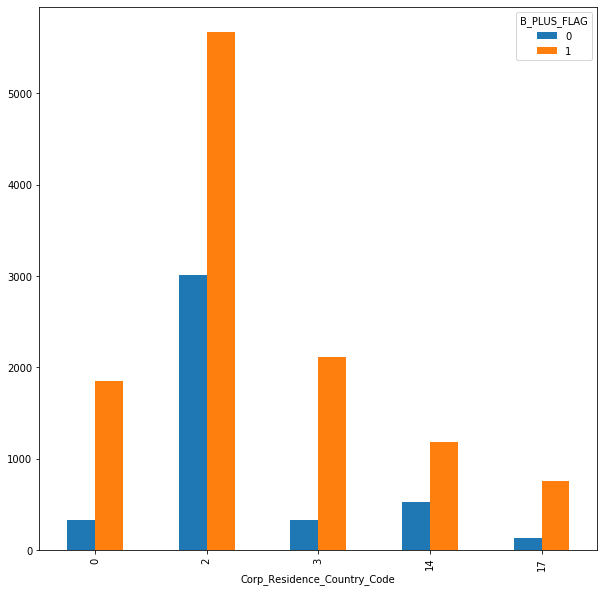

In [39]:
data.groupby(['Corp_Residence_Country_Code','B_PLUS_FLAG']).B_PLUS_FLAG.count().unstack().plot(kind='bar', legend=True, figsize = (10,10) )

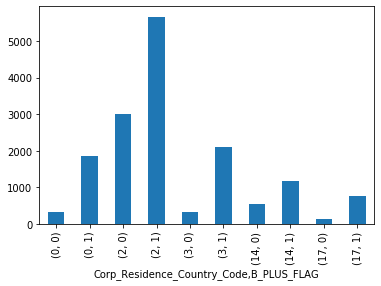

In [40]:
data.groupby(['Corp_Residence_Country_Code','B_PLUS_FLAG']).size().plot(kind = 'bar')

Looking at the relation between Country Code and Final_IG. Except for Country code 3, FINAL_IG values of 7,8 and 9 are the majority in each country.

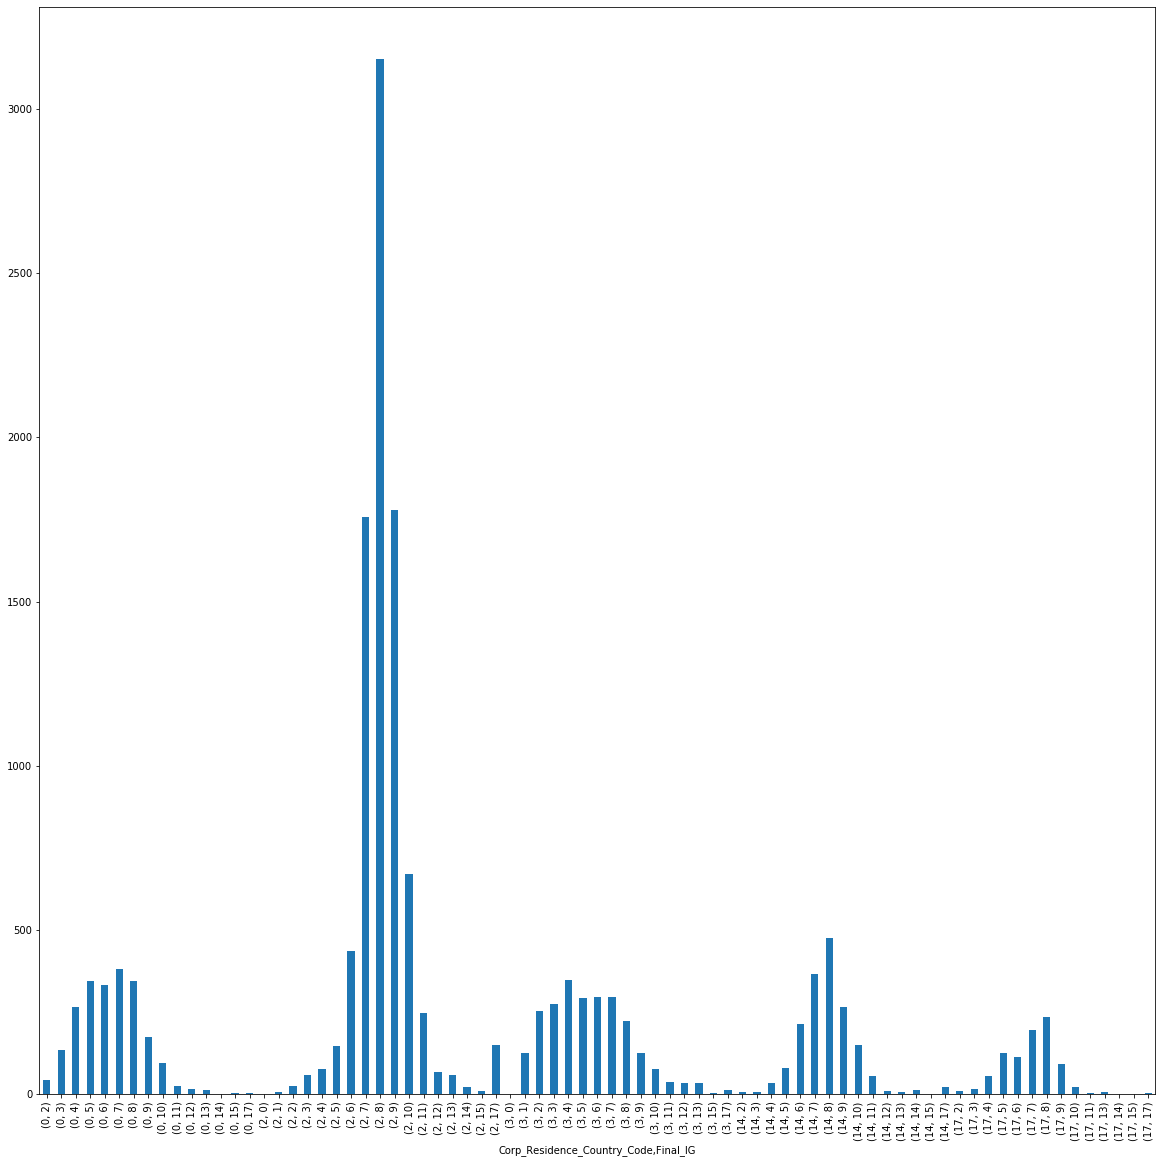

In [37]:
data.groupby(['Corp_Residence_Country_Code','Final_IG']).size().plot(kind = 'bar', figsize = (20,20))

Looking at the relationship between Country code and quantiles of 3Year Average of Assets.

Country Code 2 has majority of its companies with lower amounts of assets meaning smaller companies whereas majority of companies in the other country codes have larger assets meaning larger companies

In [45]:
data['TOTALASSET_3YearAverage_quantile'] = pd.qcut(data_left['TOTALASSET_3YearAverage'], 4, labels = False)
data.groupby(['Corp_Residence_Country_Code','TOTALASSET_3YearAverage_quantile']).size()

C:\Users\subha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Corp_Residence_Country_Code  TOTALASSET_3YearAverage_quantile
0                            0                                     39
                             1                                    356
                             2                                   1034
                             3                                    757
2                            0                                   4518
                             1                                   2940
                             2                                    811
                             3                                    405
3                            0                                     20
                             1                                     85
                             2                                    274
                             3                                   2058
14                           0                                    215
                            

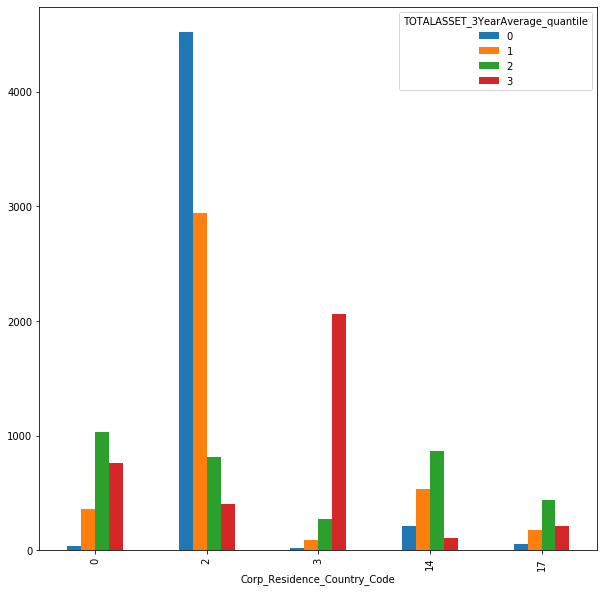

In [46]:
data.groupby(['Corp_Residence_Country_Code','TOTALASSET_3YearAverage_quantile']).TOTALASSET_3YearAverage_quantile.count().unstack().plot(kind='bar', legend=True, figsize = (10,10) )

Looking at the relationship between Country code and quantiles of 3Year Average of Revenue.

Country Code 2 has majority of its companies with lower amounts of revenue meaning smaller companies whereas majority of companies in the other country codes have larger assets meaning larger companies

In [49]:
data['TOTALREVENUE_3YearAverage_quantile'] = pd.qcut(data['TOTALREVENUE_3YearAverage'], 4, labels = False)
data.groupby(['Corp_Residence_Country_Code','TOTALREVENUE_3YearAverage_quantile']).size()


C:\Users\subha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Corp_Residence_Country_Code  TOTALREVENUE_3YearAverage_quantile
0                            0                                       12
                             1                                       79
                             2                                     1149
                             3                                      946
2                            0                                     3678
                             1                                     3247
                             2                                     1278
                             3                                      471
3                            0                                        6
                             1                                       48
                             2                                      236
                             3                                     2147
14                           0                                      209


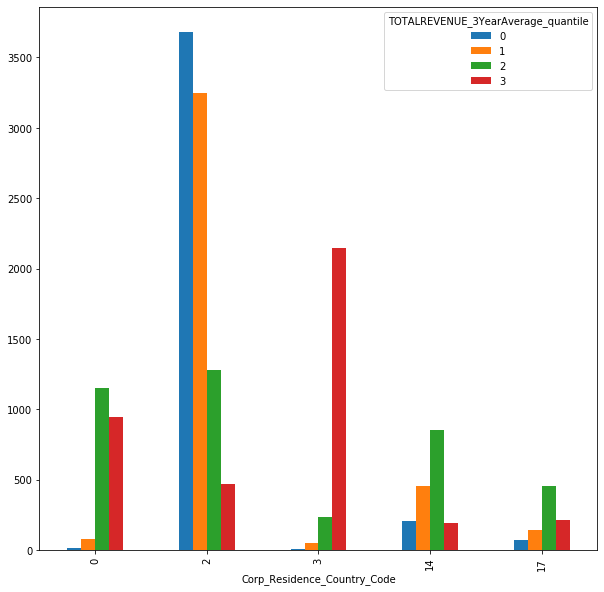

In [50]:
data.groupby(['Corp_Residence_Country_Code','TOTALREVENUE_3YearAverage_quantile']).TOTALREVENUE_3YearAverage_quantile.count().unstack().plot(kind='bar', legend=True, figsize = (10,10) )